In [168]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [169]:
import tensorflow.keras.layers.experimental.preprocessing

In [170]:
np.random.seed(42)
tf.random.set_seed(42)

In [171]:
# Split Dataset into 1) train-90% 2) validation-5% 3) test-5%
base_path = "data"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] == "err":
        continue  # We don't need to deal with errored entries.
    words_list.append(line)

np.random.shuffle(words_list)

split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

In [172]:
# Print splitting results
print(f"Number of words_list: {len(words_list)}")
print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Number of words_list: 96456
Total training samples: 86810
Total validation samples: 4823
Total test samples: 4823


In [173]:
# Create the list of image path and labels (w/ all the info)

base_image_path = os.path.join(base_path, "words")

def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples

train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

In [174]:
train_labels

['e04-030-04-08 ok 170 1489 1499 120 39 JJ sure',
 'k02-102-05-03 ok 182 836 1623 69 52 PP3A he',
 'a01-082u-01-04 ok 172 1582 1043 234 88 IN during',
 'm01-000-07-00 ok 196 339 1998 75 107 INO of',
 'g01-031-07-06 ok 152 1912 2038 167 59 NN booty',
 'f07-081b-01-06 ok 168 1366 924 350 88 NN gastronomy',
 'n03-082-04-03 ok 165 992 1414 118 135 NN boy',
 'g06-018c-04-05 ok 182 1298 1438 96 58 ATI The',
 'g06-011j-06-06 ok 182 1222 1785 146 95 CC and',
 'f04-024-01-06 ok 183 1104 981 60 70 IN in',
 'g06-050k-00-07 ok 156 1842 717 85 76 PP$ his',
 'm01-100-01-06 ok 185 1459 880 177 131 JJ flying',
 'n02-033-04-01 ok 149 940 1486 353 85 VBD presented',
 'p03-047-00-01 ok 191 393 739 127 80 UH No',
 'g06-011e-08-00 ok 154 386 2190 70 44 CS as',
 'p02-000-00-02 ok 182 752 727 97 85 AP few',
 'c01-009-08-03 ok 182 1387 2363 170 81 NN work',
 'c04-156-01-04 ok 175 989 912 65 142 INO of',
 'h02-004-09-01 ok 191 776 2424 191 76 NNS items',
 'g06-037o-03-02 ok 188 850 1274 214 75 VBD took',
 'a02

In [175]:
train_img_paths

['data/words/e04/e04-030/e04-030-04-08.png',
 'data/words/k02/k02-102/k02-102-05-03.png',
 'data/words/a01/a01-082u/a01-082u-01-04.png',
 'data/words/m01/m01-000/m01-000-07-00.png',
 'data/words/g01/g01-031/g01-031-07-06.png',
 'data/words/f07/f07-081b/f07-081b-01-06.png',
 'data/words/n03/n03-082/n03-082-04-03.png',
 'data/words/g06/g06-018c/g06-018c-04-05.png',
 'data/words/g06/g06-011j/g06-011j-06-06.png',
 'data/words/f04/f04-024/f04-024-01-06.png',
 'data/words/g06/g06-050k/g06-050k-00-07.png',
 'data/words/m01/m01-100/m01-100-01-06.png',
 'data/words/n02/n02-033/n02-033-04-01.png',
 'data/words/p03/p03-047/p03-047-00-01.png',
 'data/words/g06/g06-011e/g06-011e-08-00.png',
 'data/words/p02/p02-000/p02-000-00-02.png',
 'data/words/c01/c01-009/c01-009-08-03.png',
 'data/words/c04/c04-156/c04-156-01-04.png',
 'data/words/h02/h02-004/h02-004-09-01.png',
 'data/words/g06/g06-037o/g06-037o-03-02.png',
 'data/words/a02/a02-000/a02-000-00-06.png',
 'data/words/l07/l07-052/l07-052-04-02.pn

In [176]:
# Create the list of `clean` labels (w/ only the transcription part of the label )
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

Maximum length:  21
Vocab size:  78


In [177]:
train_labels_cleaned
len(characters)

78

In [178]:
def clean_labels(labels):
    """
    `clean` means only the transcription part of the label 
    """
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [179]:
validation_labels_cleaned

['able',
 'full',
 '.',
 'act',
 'you',
 'National',
 '-',
 'abyss',
 'said',
 'in',
 'Aviation',
 '.',
 'in',
 'Ministry',
 'the',
 'otherwise',
 'I',
 'appears',
 'of',
 'be',
 'expose',
 'Defence',
 'our',
 'gesture',
 'you',
 ',',
 'Nor',
 '.',
 'to',
 'say',
 '"',
 'about',
 'us',
 'economic',
 'the',
 'had',
 'only',
 'and',
 'few',
 'robbery',
 'By',
 'Week',
 'circumstances',
 'holds',
 'Soil',
 '"',
 'occur',
 '.',
 'Jeannie',
 'end',
 'written',
 'photographs',
 'on',
 'great',
 '?',
 'to',
 'public',
 'of',
 '1960s',
 'and',
 'And',
 'regarded',
 'told',
 ',',
 'finger',
 'an',
 'His',
 'spend',
 'One',
 'heart',
 ',',
 'opportunities',
 'way',
 ',',
 'to',
 'only',
 'saying',
 'conventional',
 'bases',
 'on',
 '.',
 'This',
 'been',
 'I',
 'verse',
 'deterioration',
 'even',
 'was',
 'who',
 'week',
 'thing',
 '.',
 'and',
 'way',
 'cluster',
 'evening',
 '.',
 'assumption',
 'teach',
 'Peacock',
 'was',
 'on',
 'to',
 '.',
 'predatory',
 'of',
 'the',
 'was',
 'of',
 'thei

In [180]:
# Build the character vocabulary

AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [181]:
len(char_to_num.get_vocabulary())

79

In [182]:
def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

In [183]:
batch_size = 64
padding_token = 99
image_width = 256
image_height = 64


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [184]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

2024-02-11 08:11:54.967094: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


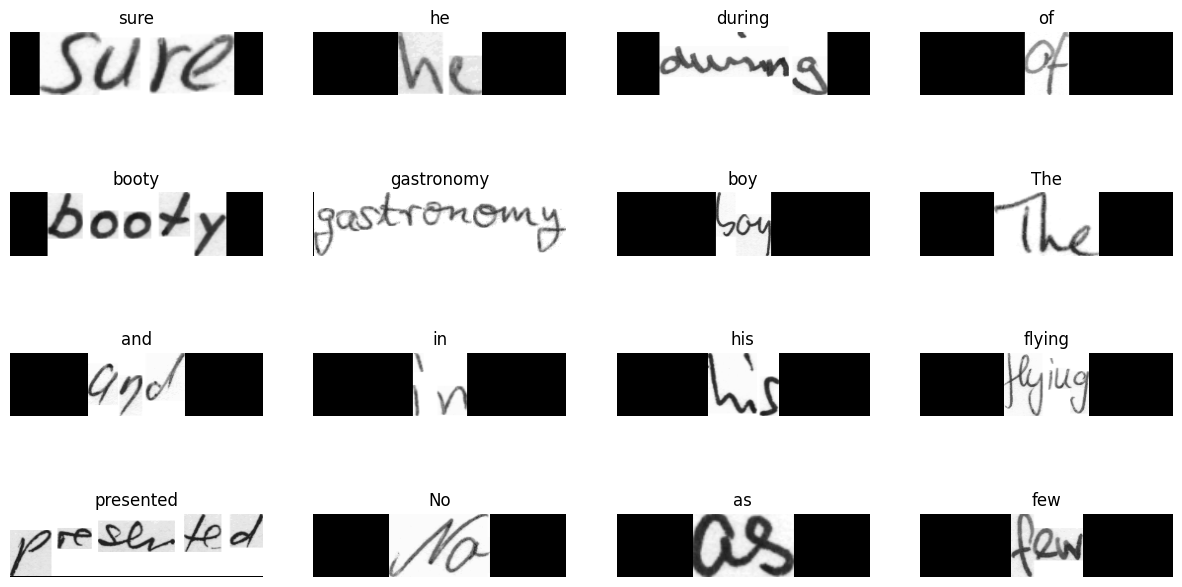

In [185]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")


plt.show()

In [186]:
print(image_width)
image_height

256


64

In [187]:
# Model

# model params
batch_size = 64
padding_token = 99

class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    # input_img = keras.Input(shape=(5, 10))
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # 1st conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)
    

    # 2nd conv block.
    x = keras.layers.Conv2D(
        128,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # # 3rd conv block.
    # x = keras.layers.Conv2D(
    #     256,
    #     (3, 3),
    #     activation="relu",
    #     kernel_initializer="he_normal",
    #     padding="same",
    #     name="Conv3",
    # )(x)
    # x = keras.layers.MaxPooling2D((1, 2), name="pool3")(x)
# 
    # # 4th conv block.
    # x = keras.layers.Conv2D(
    #     512,
    #     (3, 3),
    #     activation="relu",
    #     kernel_initializer="he_normal",
    #     padding="same",
    #     name="Conv4",
    # )(x)
# 
    # # 5th conv block.
    # x = keras.layers.Conv2D(
    #     512,
    #     (3, 3),
    #     activation="relu",
    #     kernel_initializer="he_normal",
    #     padding="same",
    #     name="Conv5",
    # )(x)
# 
    # # 6th conv block.
    # x = keras.layers.Conv2D(
    #     512,
    #     (3, 3),
    #     activation="relu",
    #     kernel_initializer="he_normal",
    #     padding="same",
    #     name="Conv6",
    # )(x)
    # x = keras.layers.MaxPooling2D((1, 2), name="pool6")(x)
    
    x = keras.layers.Reshape(target_shape=(64, 4*512), name="reshape")(x)
    x = keras.layers.Dense(512, activation="relu", name="dense1")(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)    

    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # output = x

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer_iam"
        # inputs=[input_img], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer_iam"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 256, 64, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 256, 64, 64)          640       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 128, 32, 64)          0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 128, 32, 128)         73856     ['pool1[0][0]']               
                                                                         

In [188]:
# Evaluation metric

validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )
# validation_images
# validation_labels

In [189]:
# Training

epochs = 2  # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)

Epoch 1/2
1/1 [==============================] - 1s 724ms/step
Mean edit distance for epoch 1: 20.6017
1357/1357 [==============================] - 64s 44ms/step - loss: 14.2233 - val_loss: 12.2597
Epoch 2/2
1/1 [==============================] - 0s 18ms/step
Mean edit distance for epoch 2: 20.1144
1357/1357 [==============================] - 57s 42ms/step - loss: 10.4568 - val_loss: 8.6934


In [190]:
prediction_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 256, 64, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 256, 64, 64)       640       
                                                                 
 pool1 (MaxPooling2D)        (None, 128, 32, 64)       0         
                                                                 
 Conv2 (Conv2D)              (None, 128, 32, 128)      73856     
                                                                 
 pool2 (MaxPooling2D)        (None, 64, 16, 128)       0         
                                                                 
 reshape (Reshape)           (None, 64, 2048)          0         
                                                                 
 dense1 (Dense)              (None, 64, 512)           1049

In [191]:
model.save("my_model_2024-02-11-epoch2-v4")

INFO:tensorflow:Assets written to: my_model_2024-02-11-epoch2-v4/assets


INFO:tensorflow:Assets written to: my_model_2024-02-11-epoch2-v4/assets


2/2 [==============================] - 0s 7ms/step


2024-02-11 08:14:08.631255: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


preds: [1.73085646e-05 1.29656419e-05 2.40585723e-04 2.40171037e-04
 2.27605087e-05 1.90547871e-04 2.99301992e-05 3.17342601e-05
 2.89734271e-05 2.48939232e-05 3.90002024e-05 1.74201370e-04
 5.24675525e-05 1.72129585e-05 2.33554238e-04 7.69333739e-04
 4.08030901e-04 2.77952640e-04 1.15577161e-04 1.80915202e-04
 2.55294028e-04 7.26111393e-05 1.16883297e-04 2.01216928e-04
 2.64033351e-05 3.49738621e-05 2.12857976e-05 1.43098657e-03
 5.91915334e-04 4.54159779e-03 6.68997644e-04 1.50791008e-03
 4.63815872e-04 1.56213203e-03 2.09560210e-04 5.43854898e-04
 2.62703397e-04 2.45722214e-04 1.87876611e-03 7.14947237e-04
 1.08430872e-03 1.83468184e-03 2.69151205e-04 3.43634456e-05
 7.99516332e-04 1.04880286e-03 2.42730734e-04 1.11478183e-03
 4.45222890e-04 1.57845451e-03 3.99855380e-05 9.97983516e-05
 4.06490872e-05 2.93650180e-01 3.30969016e-03 1.26765028e-01
 1.41906599e-02 8.57579857e-02 2.04199401e-04 7.15783623e-04
 5.81078930e-03 1.42454412e-02 7.58163398e-04 6.67124230e-04
 1.41280319e-03 8

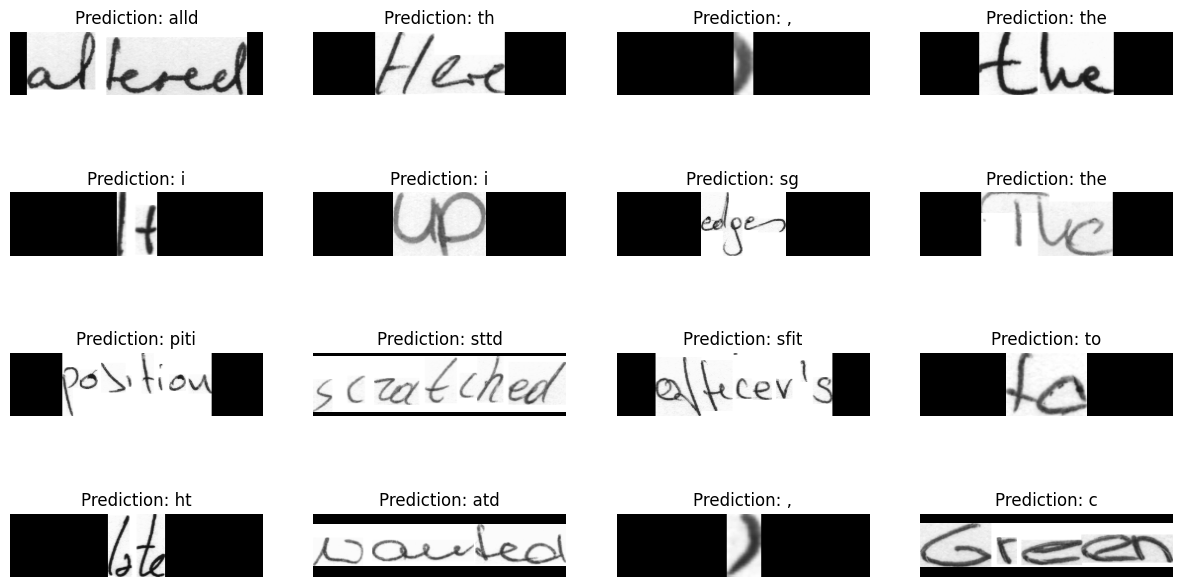

In [192]:
# Inference

# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    print('results', results)
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    print('preds:', preds[0][0])
    input_len = np.ones(preds.shape[0]) * preds.shape[1]
    print('input_len', input_len)
    pred_texts = decode_batch_predictions(preds)
    print('pred_texts:', pred_texts)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()